In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

In [10]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
wine = pd.read_csv(url, header = None, sep = ",")
wine.columns = ["class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", 
                "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", 
                "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

wine2 = wine.drop(columns = "class")
wine2.head(5)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Réaliser plusieurs kmeans en cherchant le nombre de classe directement

In [11]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = "random", n_init = 20).fit(scale(wine2))
    inertia = inertia + [kmeans.inertia_]
rsquare = [(inertia[0] - i) / inertia[0] for i in inertia]
criteres = pd.DataFrame({
    "k": range(1, 11), 
    "inertia": inertia,
    "rsquare": rsquare,
    "pseudof": [(rsquare[k-1] / k) / ((1 - rsquare[k-1]) / (wine2.shape[0] - k)) if k > 1 else None for k in range(1, 11)]
})

c:\Users\Paqua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Paqua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Paqua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Paqua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_con

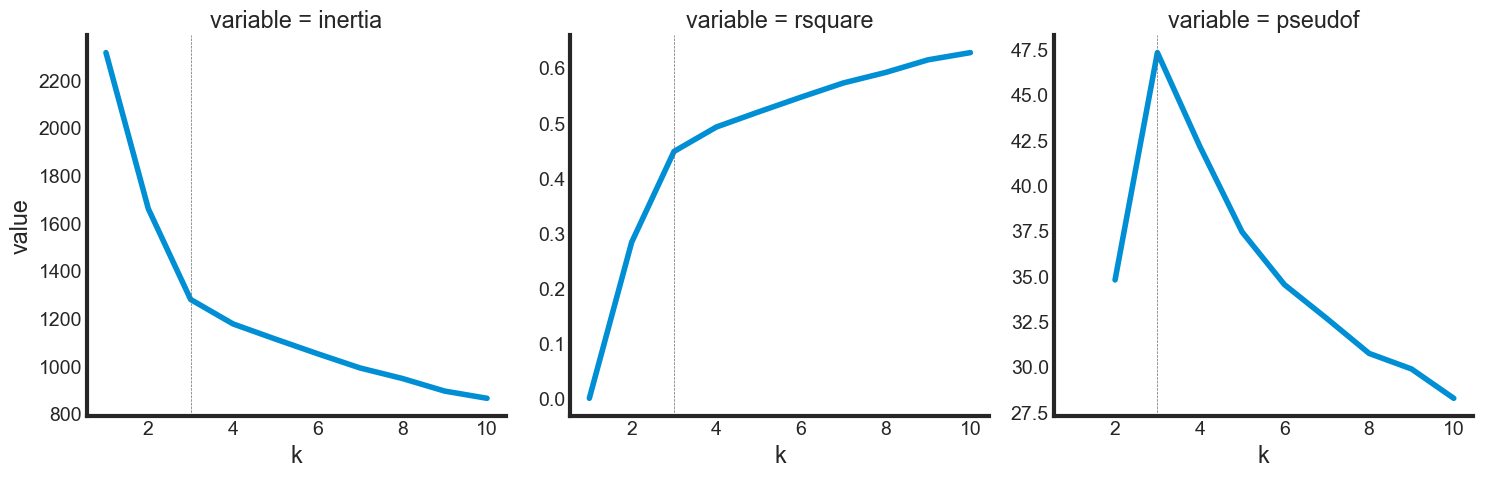

In [12]:
g = sns.FacetGrid(data = criteres.melt(id_vars = "k"), col = "variable", sharey = False, 
                      height = 5, aspect = 1)
g.map_dataframe(sns.lineplot, x = "k", y = "value")
g.map(plt.axvline, x = 3, linewidth = .5, color = "dimgray", linestyle = "--")
g.add_legend()
plt.show()

In [13]:
kmeans3 = KMeans(n_clusters = 3, n_init = 10)
kmeans3.fit(scale(wine2))

c:\Users\Paqua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10)

In [14]:
wine2.assign(classe = kmeans3.labels_).groupby("classe").mean().round(2)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
classe,,,,,,,,,,,,,
0,13.13,3.31,2.42,21.24,98.67,1.68,0.82,0.45,1.15,7.23,0.69,1.70,619.06
1,13.68,2.00,2.47,17.46,107.97,2.85,3.00,0.29,1.92,5.45,1.07,3.16,1100.23
2,12.25,1.90,2.23,20.06,92.74,2.25,2.05,0.36,1.62,2.97,1.06,2.80,510.17


c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

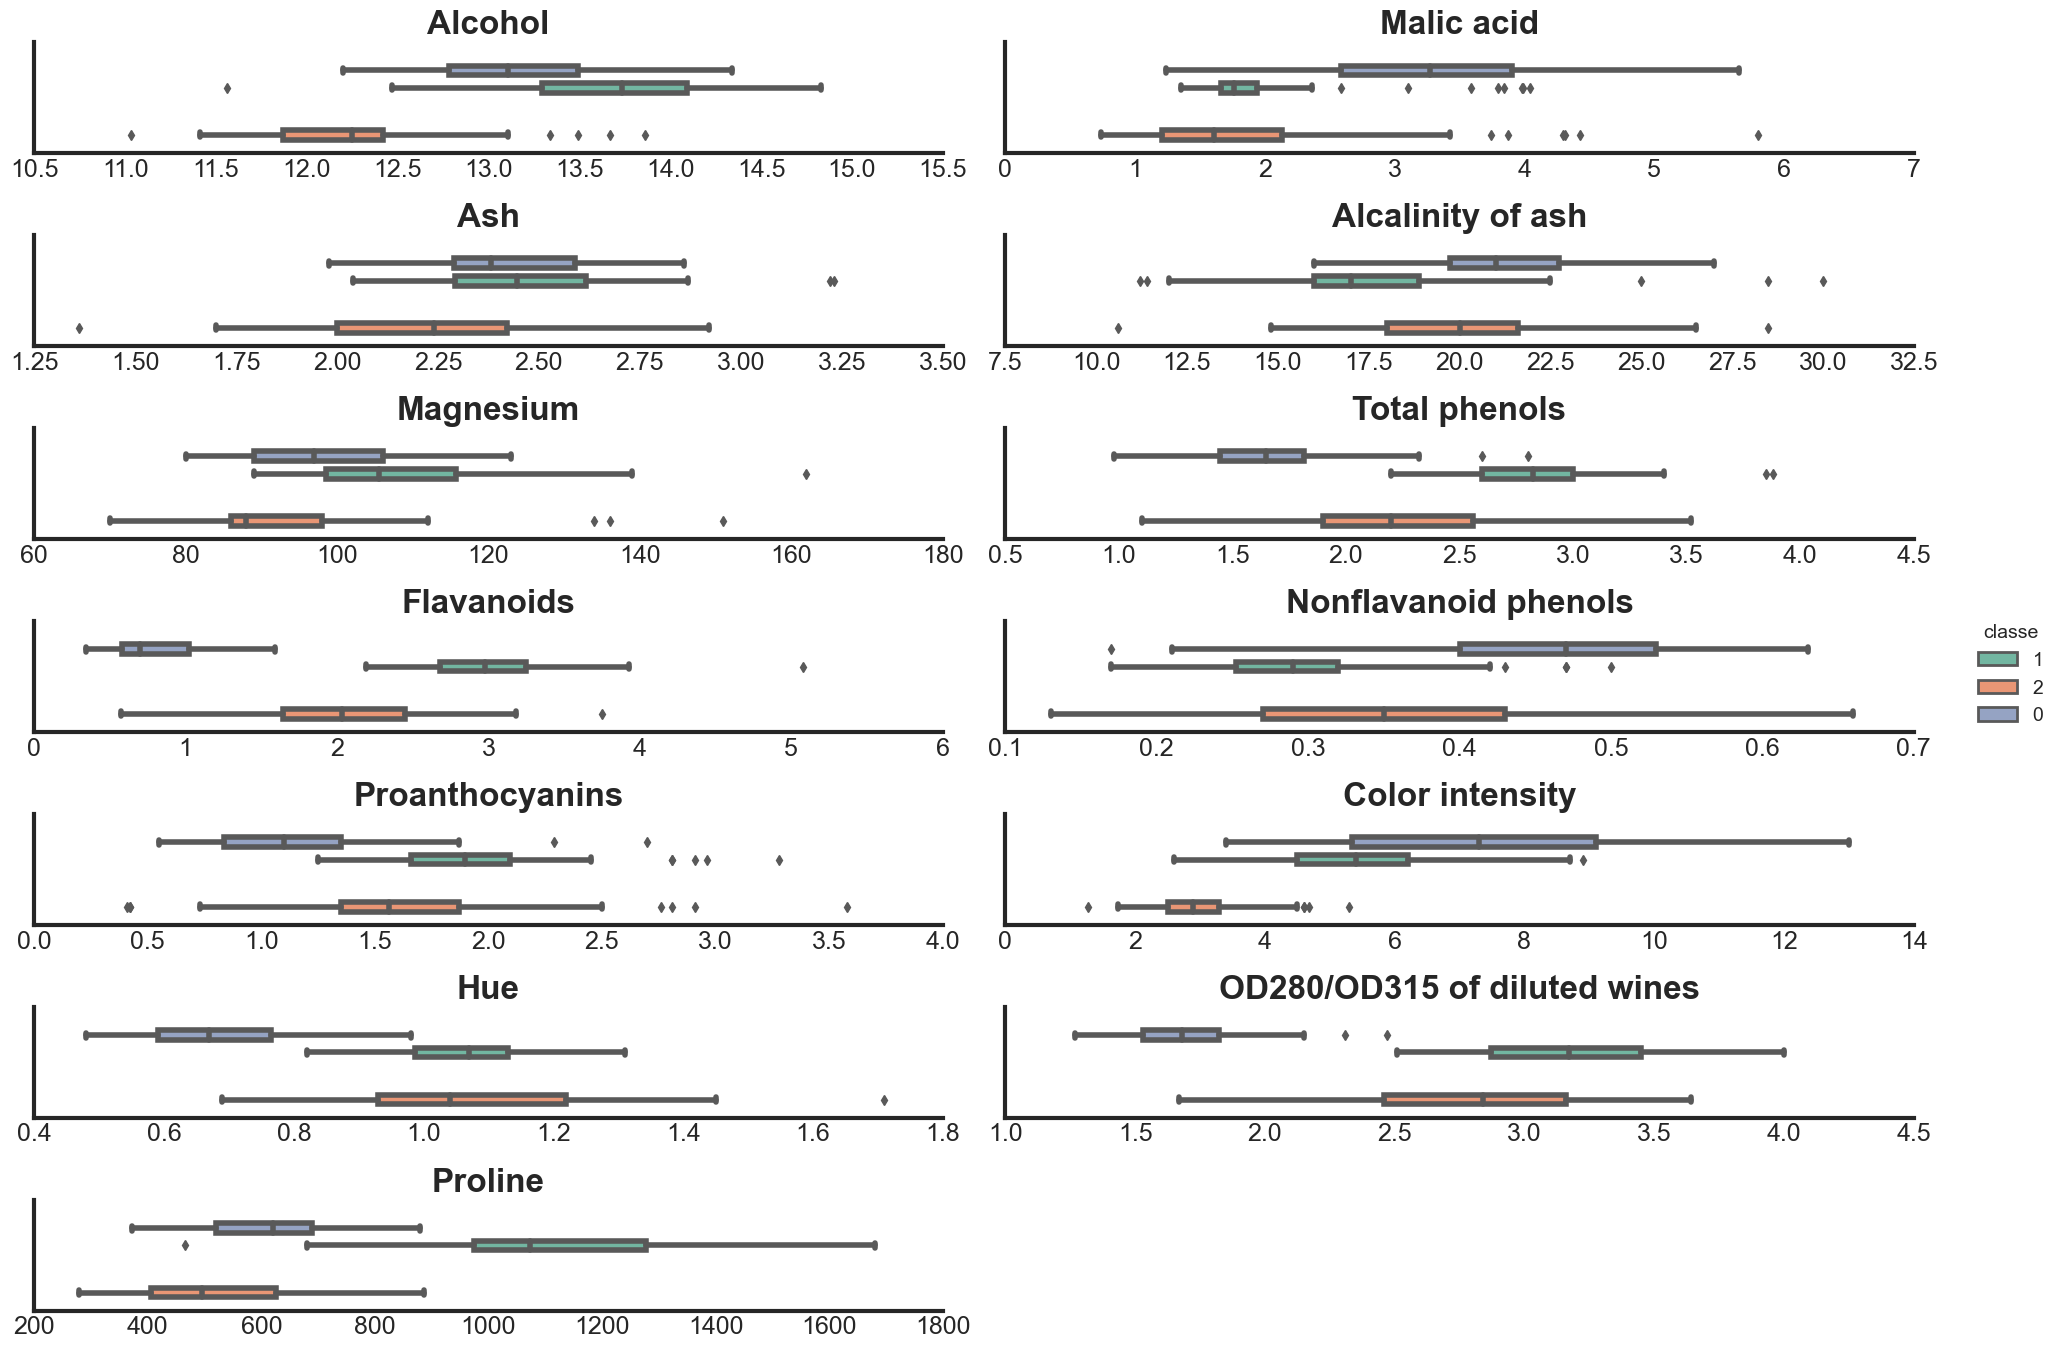

In [16]:
g = sns.catplot(
    data = wine2.assign(classe = [str(v) for v in kmeans3.labels_]) \
                .melt(id_vars = "classe"),
    x = "value", y = "classe", hue = "classe",
    kind = "box",
    col = "variable", col_wrap = 2, sharex = False, order = ["0", "1", "2"],
    height = 2, aspect = 5, palette = "Set2"
)
g.set_titles(col_template = "{col_name}", fontweight = "bold", size = 24)
g.set_xticklabels(size = 18)
g.set_yticklabels(size = 18)
g.tight_layout()
g.set_axis_labels(x_var = "", y_var = "")
plt.show()

Les densités

In [18]:
classe = kmeans3.labels_
wine2["class"] = classe
wine2.head(5)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.ty

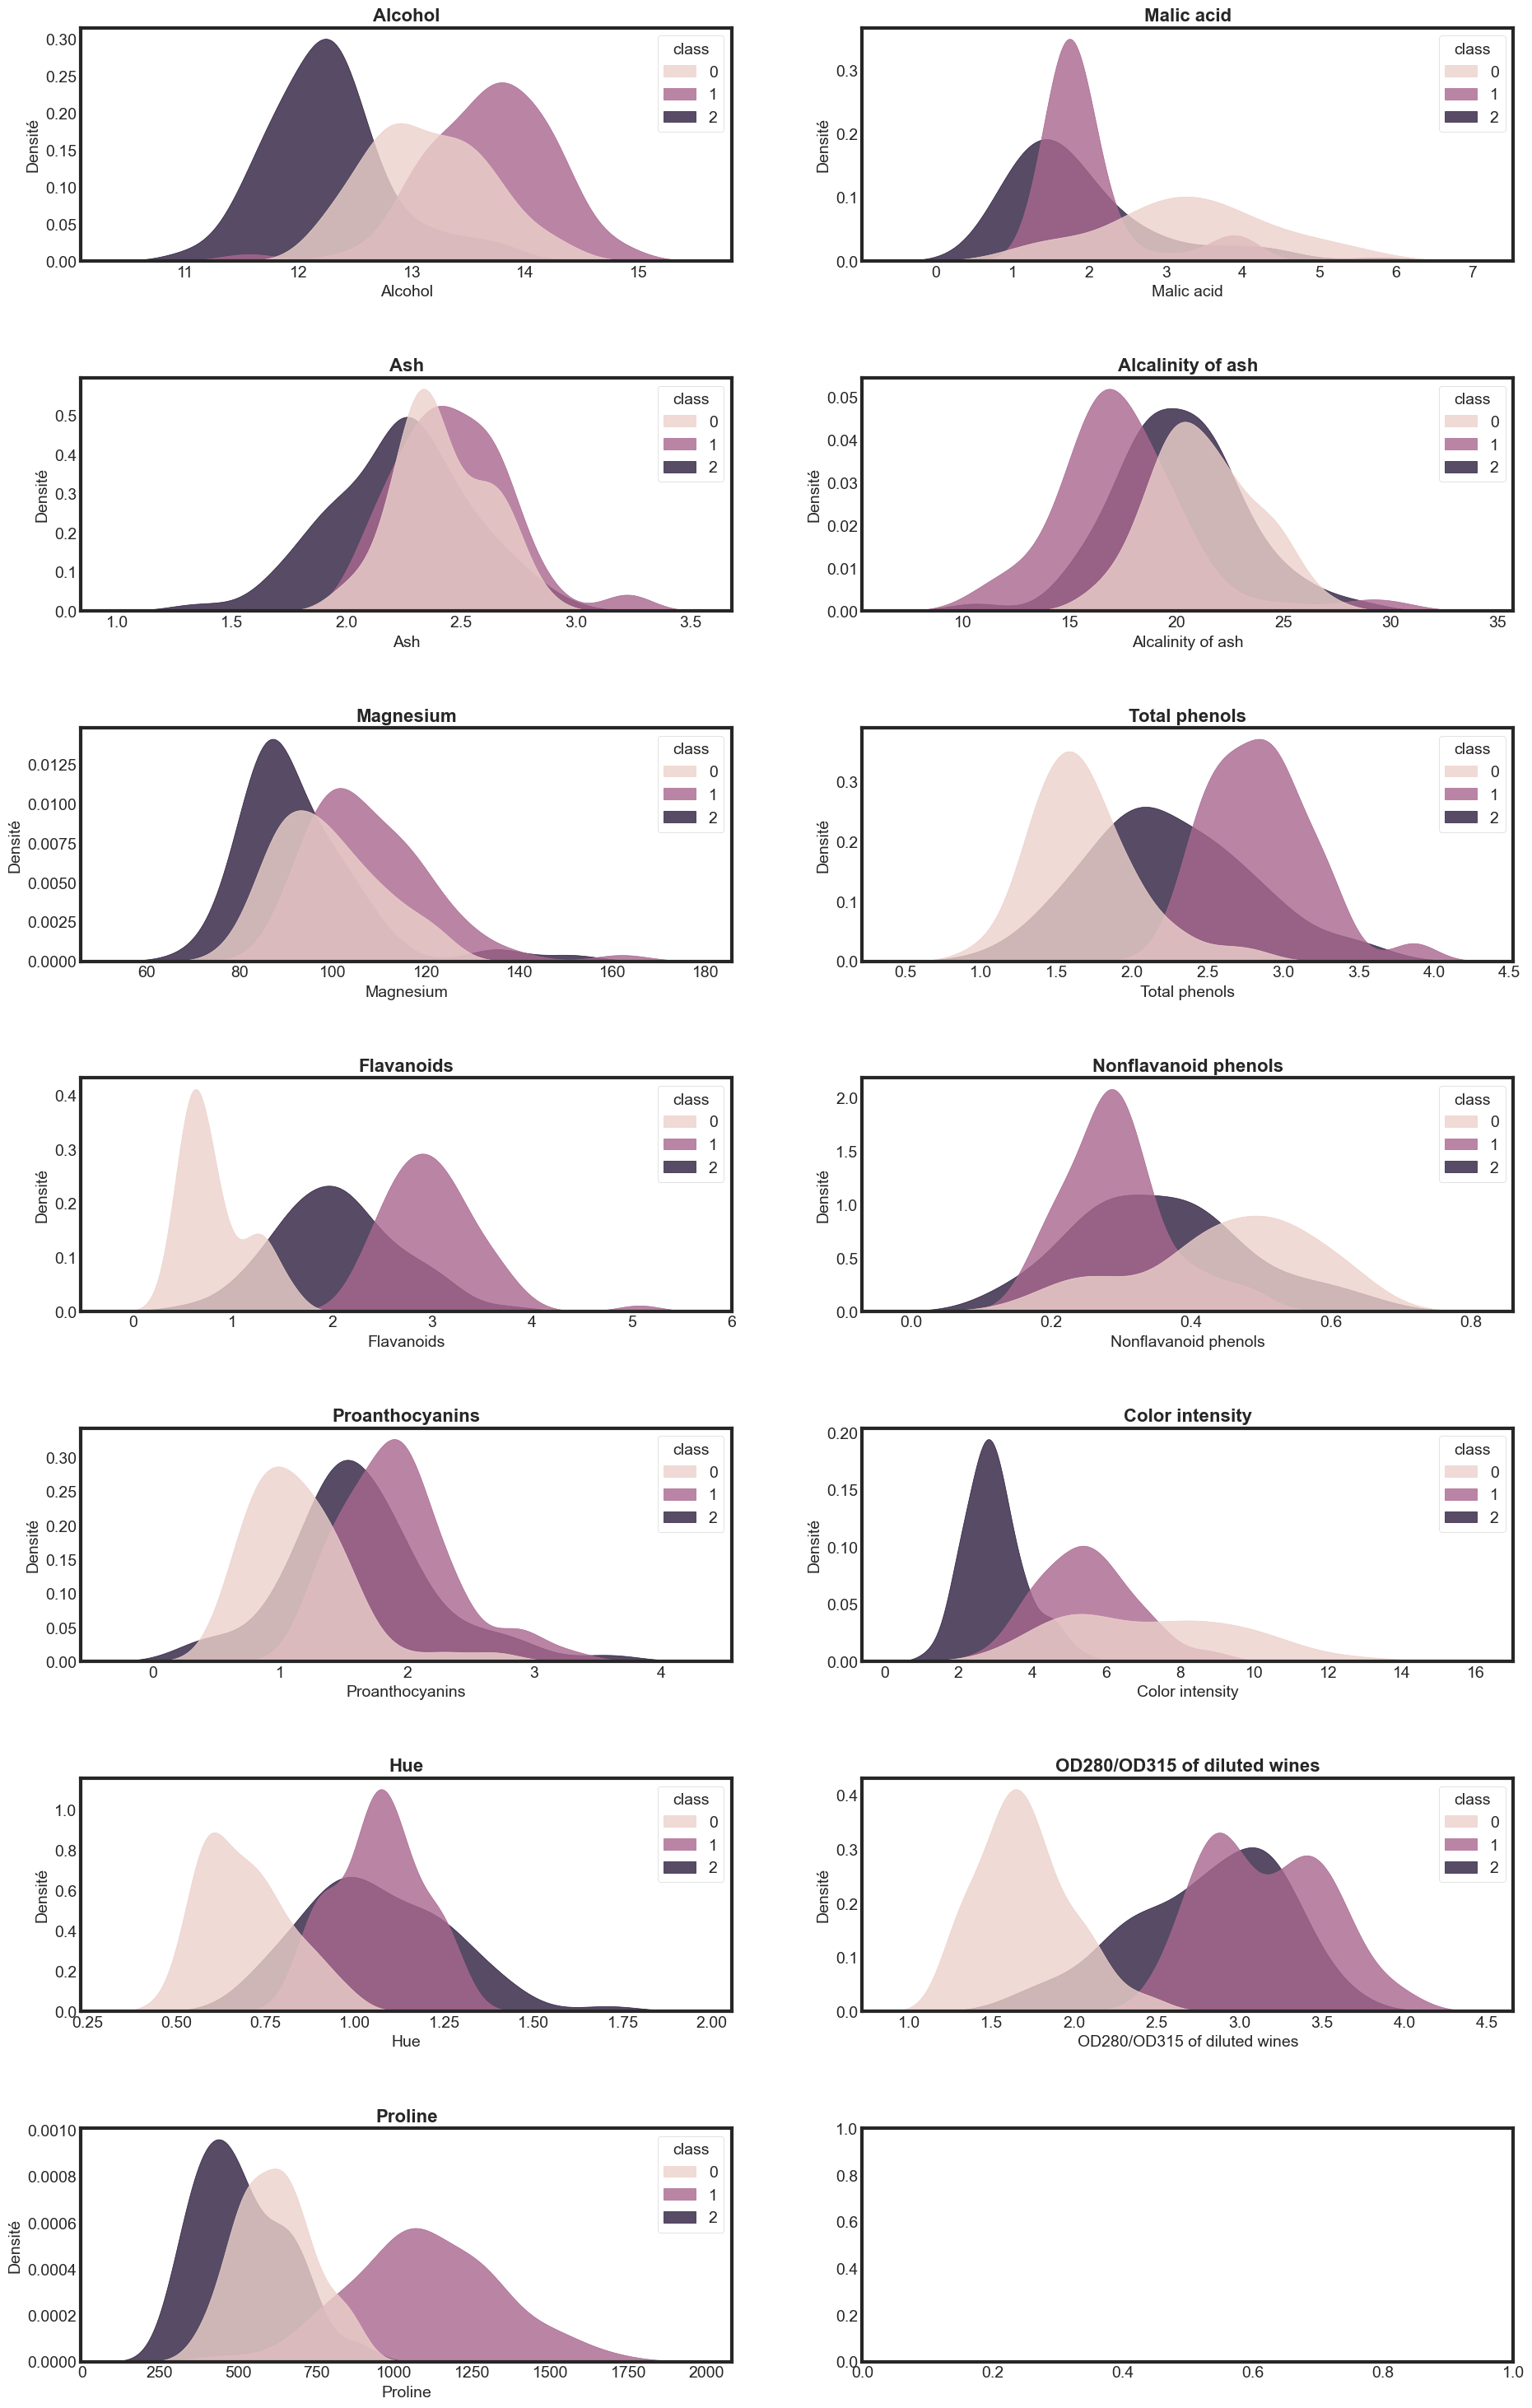

In [19]:
fig, axes = plt.subplots(7,2, figsize = (20,35)) # 7 et 2 : la multiplication donne 14 (a peu pres le nombre de variable)
plt.subplots_adjust(hspace=0.5)
columns = wine2.columns[:-1]
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data = wine2,
                x = column,
                fill = True,
                alpha = 0.8,
                hue = 'class',
                ax = ax)
    
    ax.set_title(column, fontweight = 'bold', fontsize = 16)
    ax.set_xlabel(column, fontsize = 14)
    ax.set_ylabel('Densité', fontsize = 14)
plt.show()

In [20]:
pd.crosstab(kmeans3.labels_, wine["class"])

class,1,2,3
row_0,,,
0,0,3,48
1,59,3,0
2,0,65,0
